## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\kaggle\\BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
## dropping first and last 2 columns
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [6]:
df.shape

(10127, 20)

In [7]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
## Checking for null values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
## Checking for duplicate rows
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [13]:
## Encoding Attrition_Flag feature to int. 'Attrition_Flag' as 1 and 'Existing Customer' as 0
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [14]:
df['Attrition_Flag'] = np.where(df['Attrition_Flag']=='Existing Customer', 0, 1)
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [15]:
df.Attrition_Flag.astype('int64')

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

skewness of Attrition_Flag:  1.8484488579523548
kurtosis of Attrition_Flag:  1.4170429959116353
Distribution plot of Attrition_Flag:


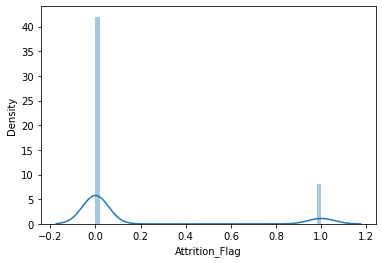

Boxplot of Attrition_Flag: 


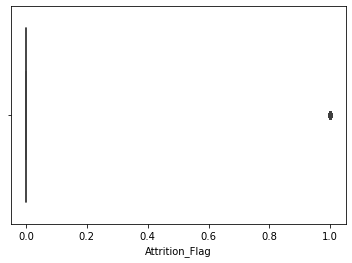

skewness of Customer_Age:  -0.033605016317173456
kurtosis of Customer_Age:  -0.2886199152745088
Distribution plot of Customer_Age:


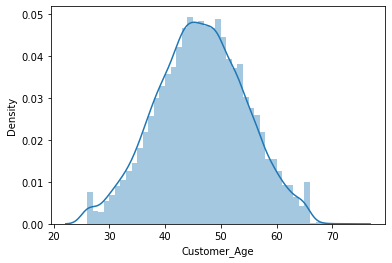

Boxplot of Customer_Age: 


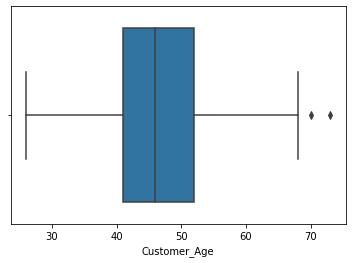

skewness of Dependent_count:  -0.020825535616339912
kurtosis of Dependent_count:  -0.6830166530893709
Distribution plot of Dependent_count:


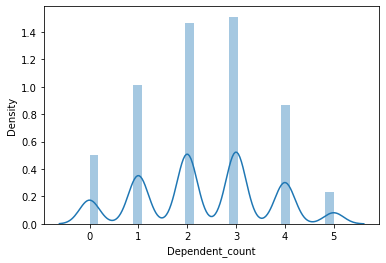

Boxplot of Dependent_count: 


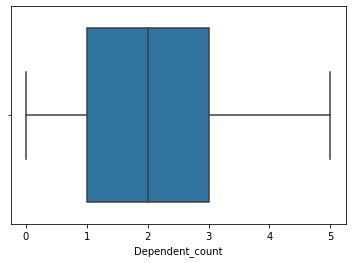

skewness of Months_on_book:  -0.10656535989402989
kurtosis of Months_on_book:  0.40010012019986707
Distribution plot of Months_on_book:


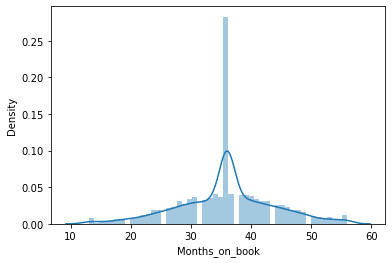

Boxplot of Months_on_book: 


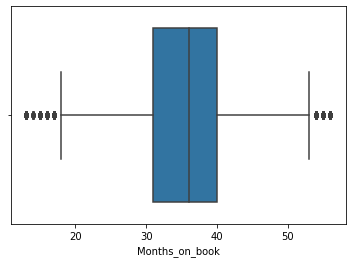

skewness of Total_Relationship_Count:  -0.16245241498173682
kurtosis of Total_Relationship_Count:  -1.0061305074402487
Distribution plot of Total_Relationship_Count:


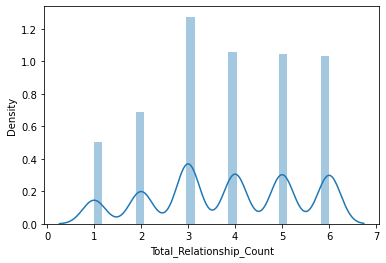

Boxplot of Total_Relationship_Count: 


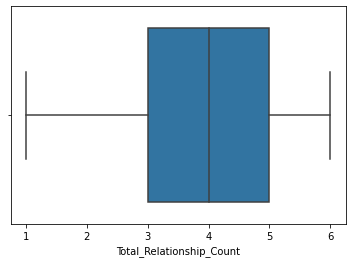

skewness of Months_Inactive_12_mon:  0.6330611289713137
kurtosis of Months_Inactive_12_mon:  1.098522613771138
Distribution plot of Months_Inactive_12_mon:


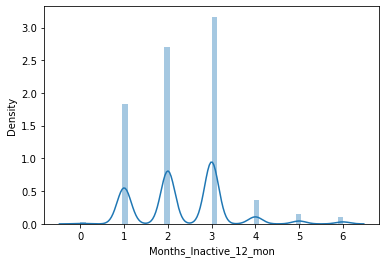

Boxplot of Months_Inactive_12_mon: 


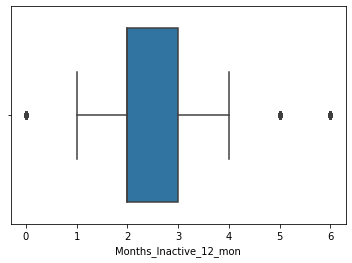

skewness of Contacts_Count_12_mon:  0.011005626218976492
kurtosis of Contacts_Count_12_mon:  0.0008626566254124057
Distribution plot of Contacts_Count_12_mon:


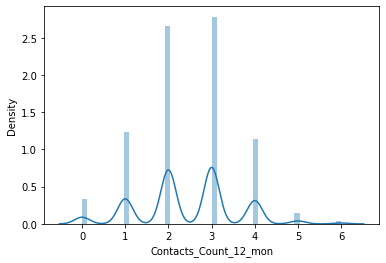

Boxplot of Contacts_Count_12_mon: 


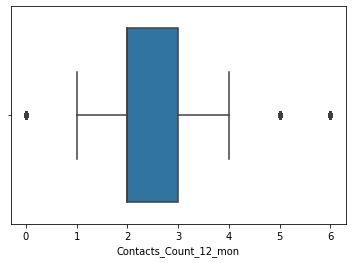

skewness of Credit_Limit:  1.666725807993647
kurtosis of Credit_Limit:  1.8089893357093434
Distribution plot of Credit_Limit:


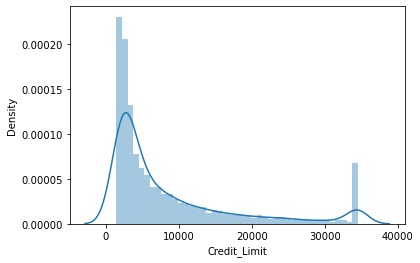

Boxplot of Credit_Limit: 


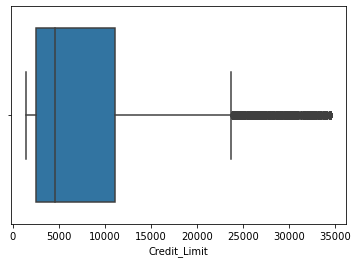

skewness of Total_Revolving_Bal:  -0.14883725028007228
kurtosis of Total_Revolving_Bal:  -1.145991781532597
Distribution plot of Total_Revolving_Bal:


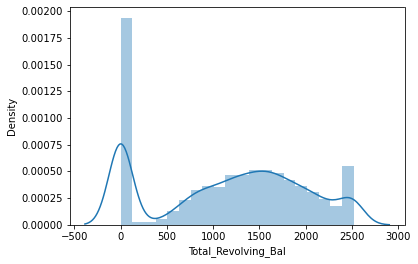

Boxplot of Total_Revolving_Bal: 


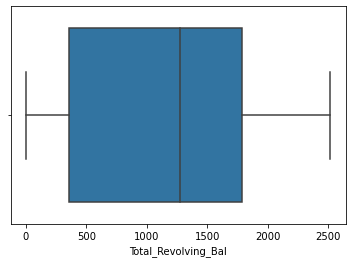

skewness of Avg_Open_To_Buy:  1.6616965459311595
kurtosis of Avg_Open_To_Buy:  1.7986172957122664
Distribution plot of Avg_Open_To_Buy:


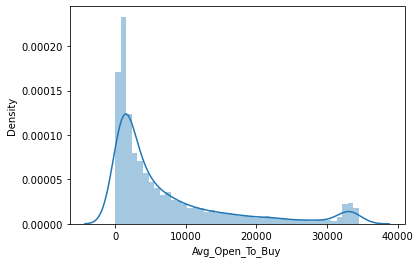

Boxplot of Avg_Open_To_Buy: 


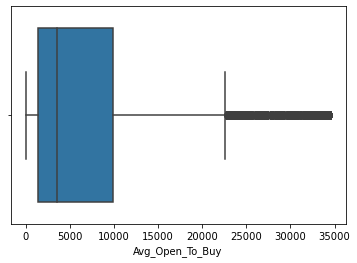

skewness of Total_Amt_Chng_Q4_Q1:  1.7320634114286038
kurtosis of Total_Amt_Chng_Q4_Q1:  9.993501178599228
Distribution plot of Total_Amt_Chng_Q4_Q1:


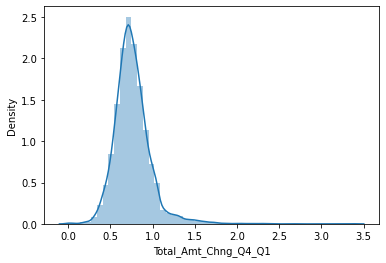

Boxplot of Total_Amt_Chng_Q4_Q1: 


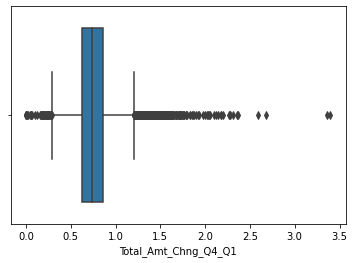

skewness of Total_Trans_Amt:  2.0410034025756936
kurtosis of Total_Trans_Amt:  3.8940234056985163
Distribution plot of Total_Trans_Amt:


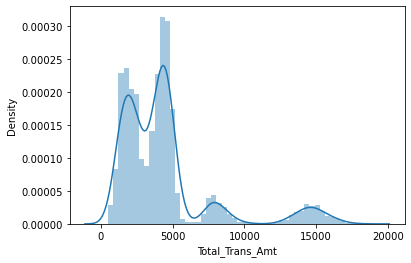

Boxplot of Total_Trans_Amt: 


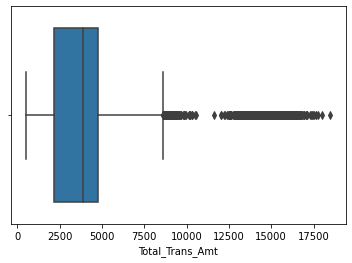

skewness of Total_Trans_Ct:  0.15367306849872275
kurtosis of Total_Trans_Ct:  -0.36716324112759624
Distribution plot of Total_Trans_Ct:


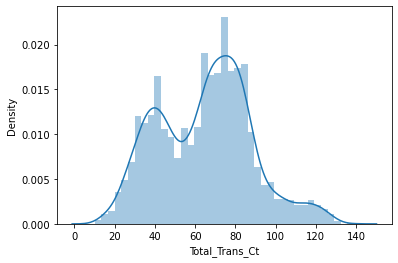

Boxplot of Total_Trans_Ct: 


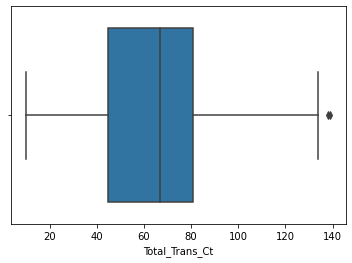

skewness of Total_Ct_Chng_Q4_Q1:  2.0640305679077477
kurtosis of Total_Ct_Chng_Q4_Q1:  15.689292901407043
Distribution plot of Total_Ct_Chng_Q4_Q1:


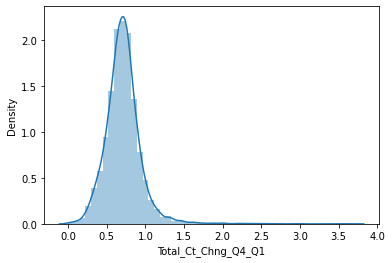

Boxplot of Total_Ct_Chng_Q4_Q1: 


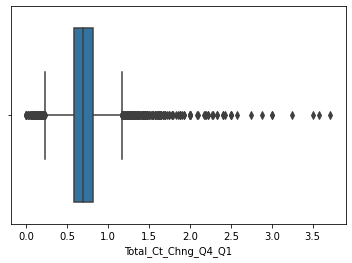

skewness of Avg_Utilization_Ratio:  0.7180079967731994
kurtosis of Avg_Utilization_Ratio:  -0.7949719514980287
Distribution plot of Avg_Utilization_Ratio:


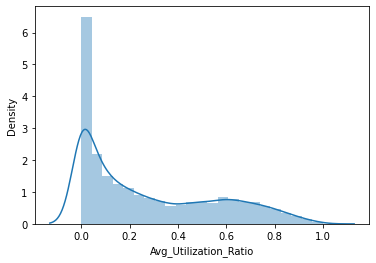

Boxplot of Avg_Utilization_Ratio: 


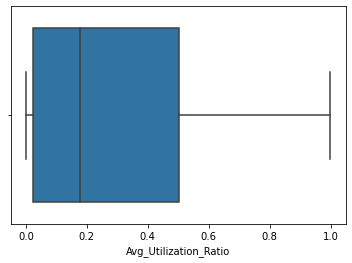

In [16]:
## univariate analysis
for col in df.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'int32':
        print('skewness of {}: '.format(col), df[col].skew())
        print('kurtosis of {}: '.format(col), df[col].kurt())
        print('Distribution plot of {}:'.format(col))
        sns.distplot(df[col])
        plt.show()
        print('Boxplot of {}: '.format(col))
        sns.boxplot(x=col, data=df)
        plt.show()

## Numerical Features Analysis:

In [17]:
## Numerical columns
[x for x in df.columns if (df[x].dtypes == 'int64' or df[x].dtypes == 'float64' or df[x].dtypes == 'int32')]

['Attrition_Flag',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

([<matplotlib.patches.Wedge at 0x2765fcd0070>,
 [Text(-1.050367793951052, 0.5802822566910004, '0'),
  Text(0.9628371693563555, -0.5319253568930898, '1')],
 [Text(-0.6127145464714471, 0.3384979830697502, '83.93%'),
  Text(0.5251839105580121, -0.2901411037598671, '16.07%')])

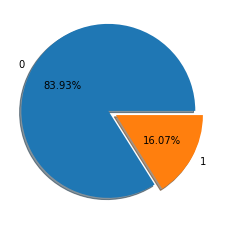

In [18]:
# Analysis of Attrition_Flag Feature
plt.pie(df['Attrition_Flag'].value_counts().values, labels= df['Attrition_Flag'].value_counts().keys(), explode=(0.1,0), shadow=True, autopct= '%1.2F%%')

#### 83.93% of customers are active and 16.07% of customers have closed accounts

In [19]:
#Analysis of Customer_Age feature
len(df['Customer_Age'].unique())
## 45 unique age values of customers

45

In [20]:
# We need to convert Age feature's continous values into categorical values by either Binning or Normalisation.
# We will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [21]:
print(max(df['Customer_Age']))
print(min(df['Customer_Age']))

73
26


In [22]:
# The maximum age of a Customer is 73 and minimun age is 26. 
#So lets divide the range from 20-80 into 6 bins. So 60/6=10. So bins of size 10.
def age_bin(customer_age):
    if customer_age in range(20, 30):
        return 0
    elif customer_age in range(30, 40):
        return 1
    elif customer_age in range(40,50):
        return 2
    elif customer_age in range(50,60):
        return 3
    elif customer_age in range(60,70):
        return 4
    else: return 5

In [23]:
df['Cust_Age'] = df['Customer_Age'].apply(age_bin)
df['Cust_Age'].head()

0    2
1    2
2    3
3    2
4    2
Name: Cust_Age, dtype: int64

<AxesSubplot:xlabel='Cust_Age', ylabel='count'>

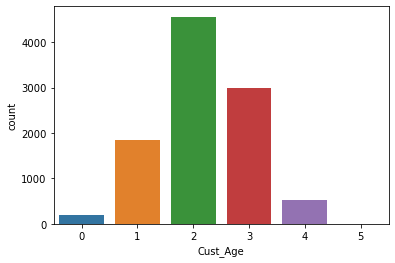

In [24]:
sns.countplot(df['Cust_Age'])

In [25]:
df['Cust_Age'].value_counts()
# more customers are of age groups 40-50 and 50-60.

2    4561
3    2998
1    1841
4     530
0     195
5       2
Name: Cust_Age, dtype: int64

<AxesSubplot:xlabel='Cust_Age', ylabel='count'>

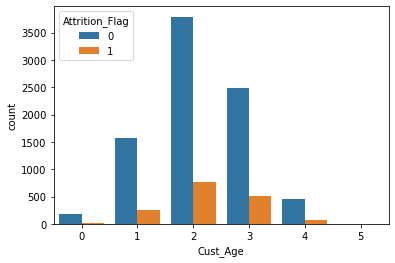

In [26]:
sns.countplot(df['Cust_Age'], hue=df['Attrition_Flag'])

In [27]:
#Analysis of Dependent_count Feature
df['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

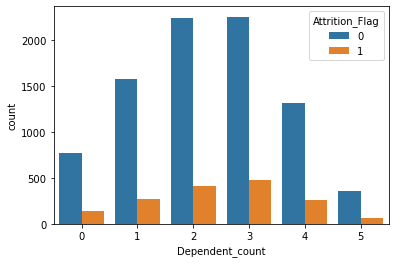

In [28]:
sns.countplot(df['Dependent_count'], hue= df['Attrition_Flag'])
## Customer attrition is more where dependent_count is 3 followed by 2 dependents

In [29]:
# Analysis on Feature Months_on_book (Period of relationship with Bank)
df['Months_on_book'].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

<AxesSubplot:>

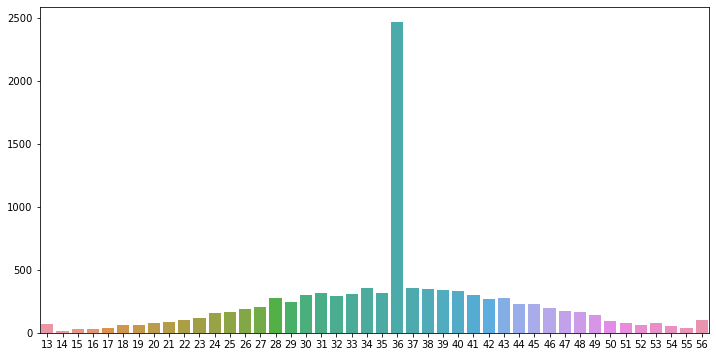

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x= df['Months_on_book'].value_counts().index, y = df['Months_on_book'].value_counts().values)
# 2463 customers have an account for about 36 months

In [31]:
# Analysis on Feature Total_Relationship_Count(Total no. of products held by the customer)
df['Total_Relationship_Count'].value_counts()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

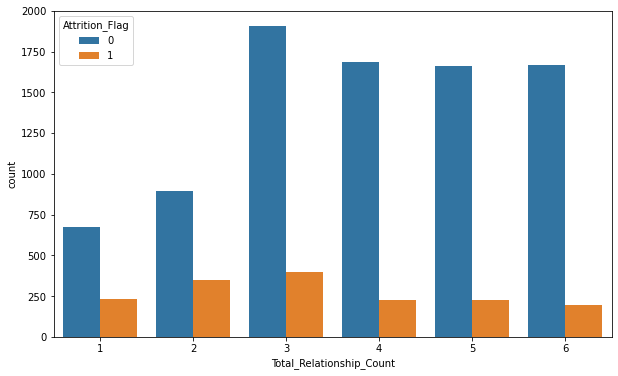

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df['Total_Relationship_Count'], hue = df['Attrition_Flag'])

In [33]:
#Analysis on feature Months_Inactive_12_mon(No. of months inactive in the last 12 months)
df['Months_Inactive_12_mon'].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

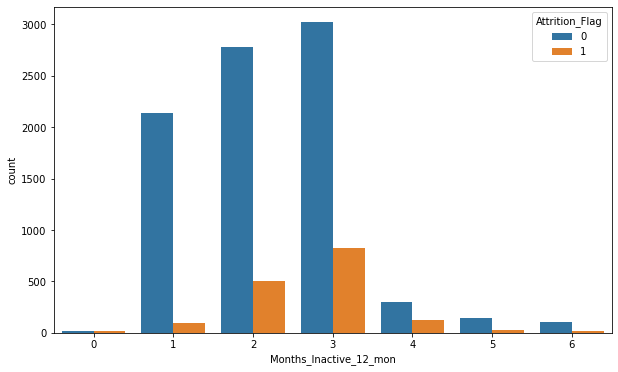

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(df['Months_Inactive_12_mon'], hue = df['Attrition_Flag'])

In [35]:
# Analysis on feature Contacts_Count_12_mon (No. of Contacts in the last 12 months)
df['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

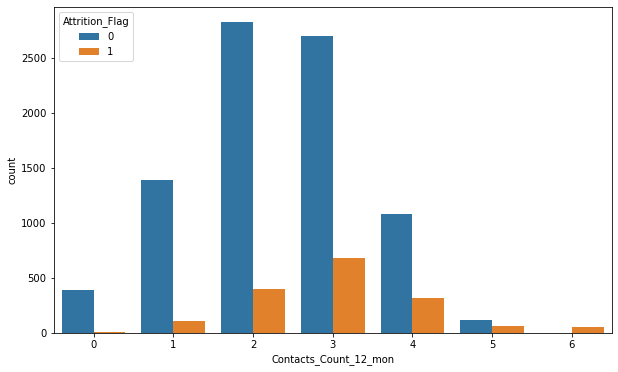

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['Contacts_Count_12_mon'], hue = df['Attrition_Flag'])

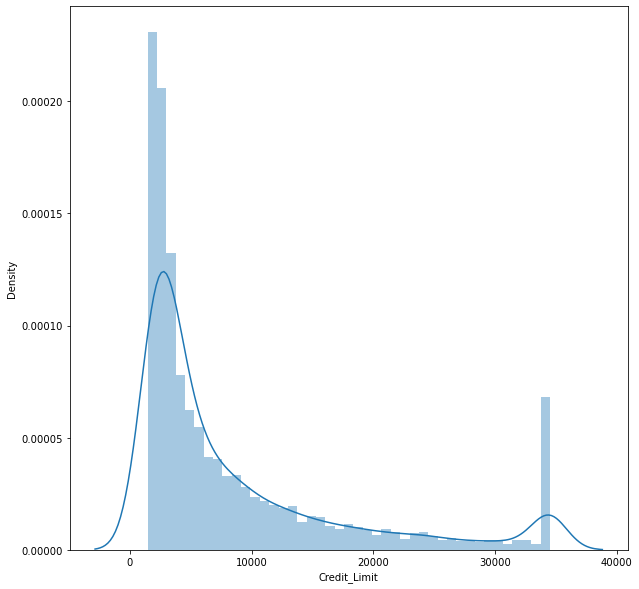

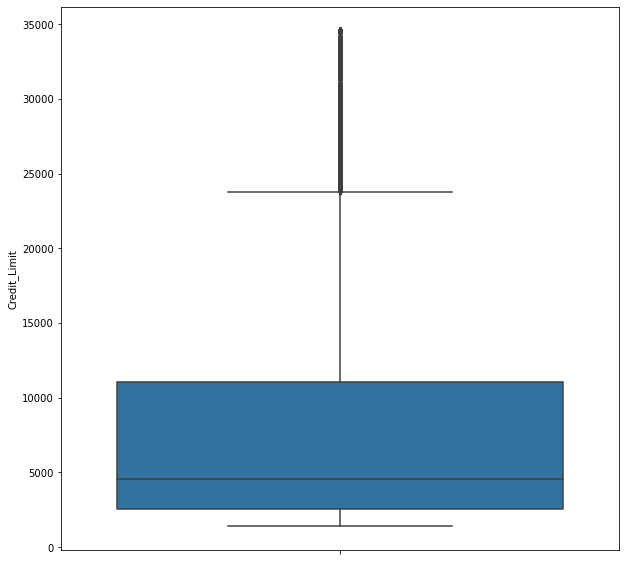

In [37]:
plt.figure(figsize=(10,10))
sns.distplot(df['Credit_Limit'])
plt.show()
plt.figure(figsize=(10,10))
sns.boxplot(y=df['Credit_Limit'])
plt.show()

## Categorical Feature Analysis

In [38]:
cat_col=[col for col in df.columns if df[col].dtypes == 'object' ]
cat_col

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

<AxesSubplot:xlabel='Gender', ylabel='count'>

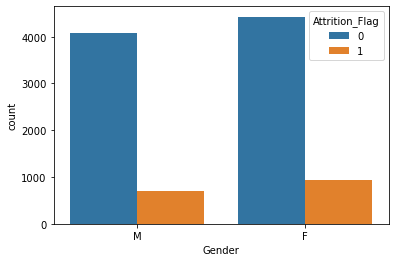

In [39]:
# Analysis on Gender Feature
sns.countplot(df['Gender'], hue = df['Attrition_Flag'])

#### Observation: we have more of female customers and attrition rate is also high in female customers

In [40]:
df['Gender'].value_counts()/len(df['Gender'])

F    0.529081
M    0.470919
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

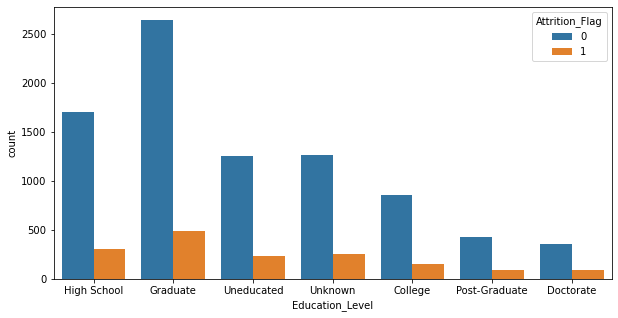

In [41]:
#Analysis on Education_Level
plt.figure(figsize=(10,5))
sns.countplot(df['Education_Level'], hue=df['Attrition_Flag'])

#### Observation: Attrition rate is high in graduate customers followed by high school customers

In [42]:
df['Education_Level'].value_counts()/len(df['Education_Level'])

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

In [43]:
#Analysis on Marital_Status Feature
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [44]:
df['Marital_Status'].value_counts()/len(df['Marital_Status'])

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

In [45]:
df[df['Attrition_Flag']==1]['Marital_Status'].value_counts()

Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

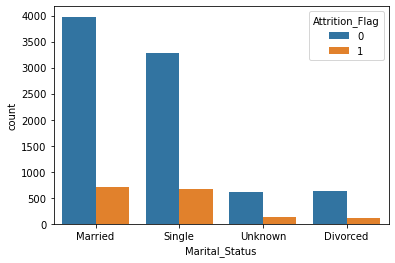

In [46]:
sns.countplot(df['Marital_Status'], hue= df['Attrition_Flag'])

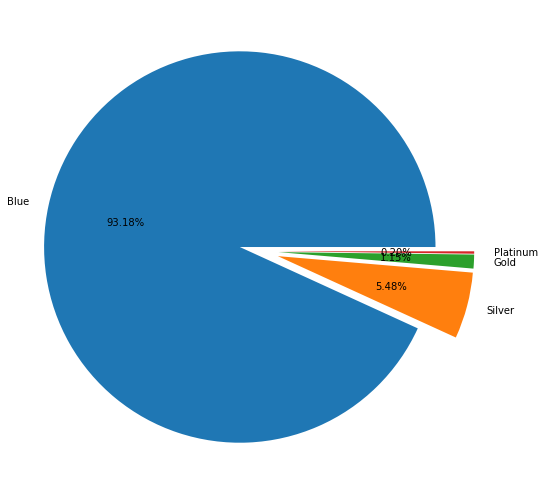

In [47]:
#Analysis on Card_Category
values = df['Card_Category'].value_counts().values
labels = df['Card_Category'].value_counts().keys()
plt.figure(figsize=(10,9))
plt.pie(values, labels=labels, explode=(0.1,0.1,0.1,0.1), autopct='%1.2F%%', shadow=False)
plt.show()

#### observation: 93.18% of customers use blue card and 5.48% use silver cards

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

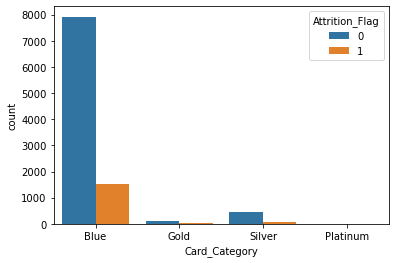

In [48]:
sns.countplot(df['Card_Category'], hue=df['Attrition_Flag'])

In [49]:
#Analysis on Income_Category feature
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [50]:
df['Income_Category'].value_counts()/len(df['Income_Category'])

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

<AxesSubplot:xlabel='Income_Category', ylabel='Count'>

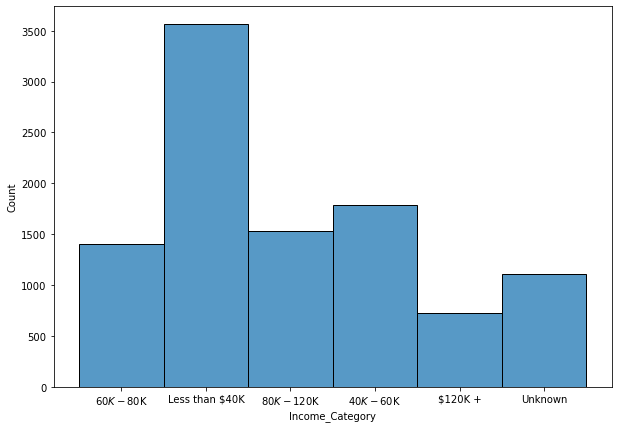

In [51]:
plt.figure(figsize=(10,7))
sns.histplot(df['Income_Category'])

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

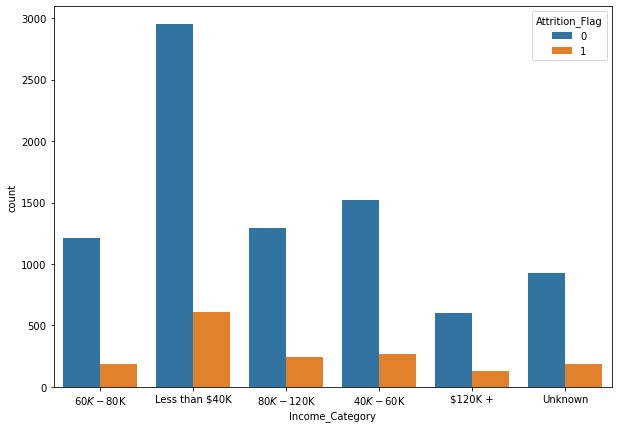

In [52]:
plt.figure(figsize=(10,7))
sns.countplot(df['Income_Category'], hue=df['Attrition_Flag'])

#### Observation: more number of customers from income_category 'less than $40K'

## Encoding the categorical features into numerical features


In [53]:
df_en = pd.get_dummies(df, columns = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], drop_first=True)

In [54]:
df_en.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


## Standardization of featurtes

In [55]:
df_encoded = df_en.iloc[:,1:]
df_attrition_flag = df_en[['Attrition_Flag']]

In [69]:
df_encoded.drop(['Customer_Age'], axis=1, inplace =True)

In [56]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale = scale.fit_transform(df_encoded)
scale

array([[-0.16540558,  0.50336813,  0.38462088, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [ 0.33357038,  2.04319867,  1.01071482, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [ 0.58305837,  0.50336813,  0.00896451, ..., -0.10764411,
        -0.044484  , -0.24079371],
       ...,
       [-0.29014957, -1.03646242,  0.00896451, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [-2.03656544, -0.26654715,  0.00896451, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [-0.41489356, -0.26654715, -1.36844216, ..., -0.10764411,
        -0.044484  ,  4.15293232]])

In [57]:
df_scaled = pd.DataFrame(scale, columns=df_encoded.columns)
df_scaled.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,1.252337,-0.282609,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,-0.798507,-0.282609,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,-0.798507,3.538459,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794


In [66]:
df_scaled.drop(['Customer_Age'], axis=1, inplace=True)

## Multivariate Analysis

<AxesSubplot:>

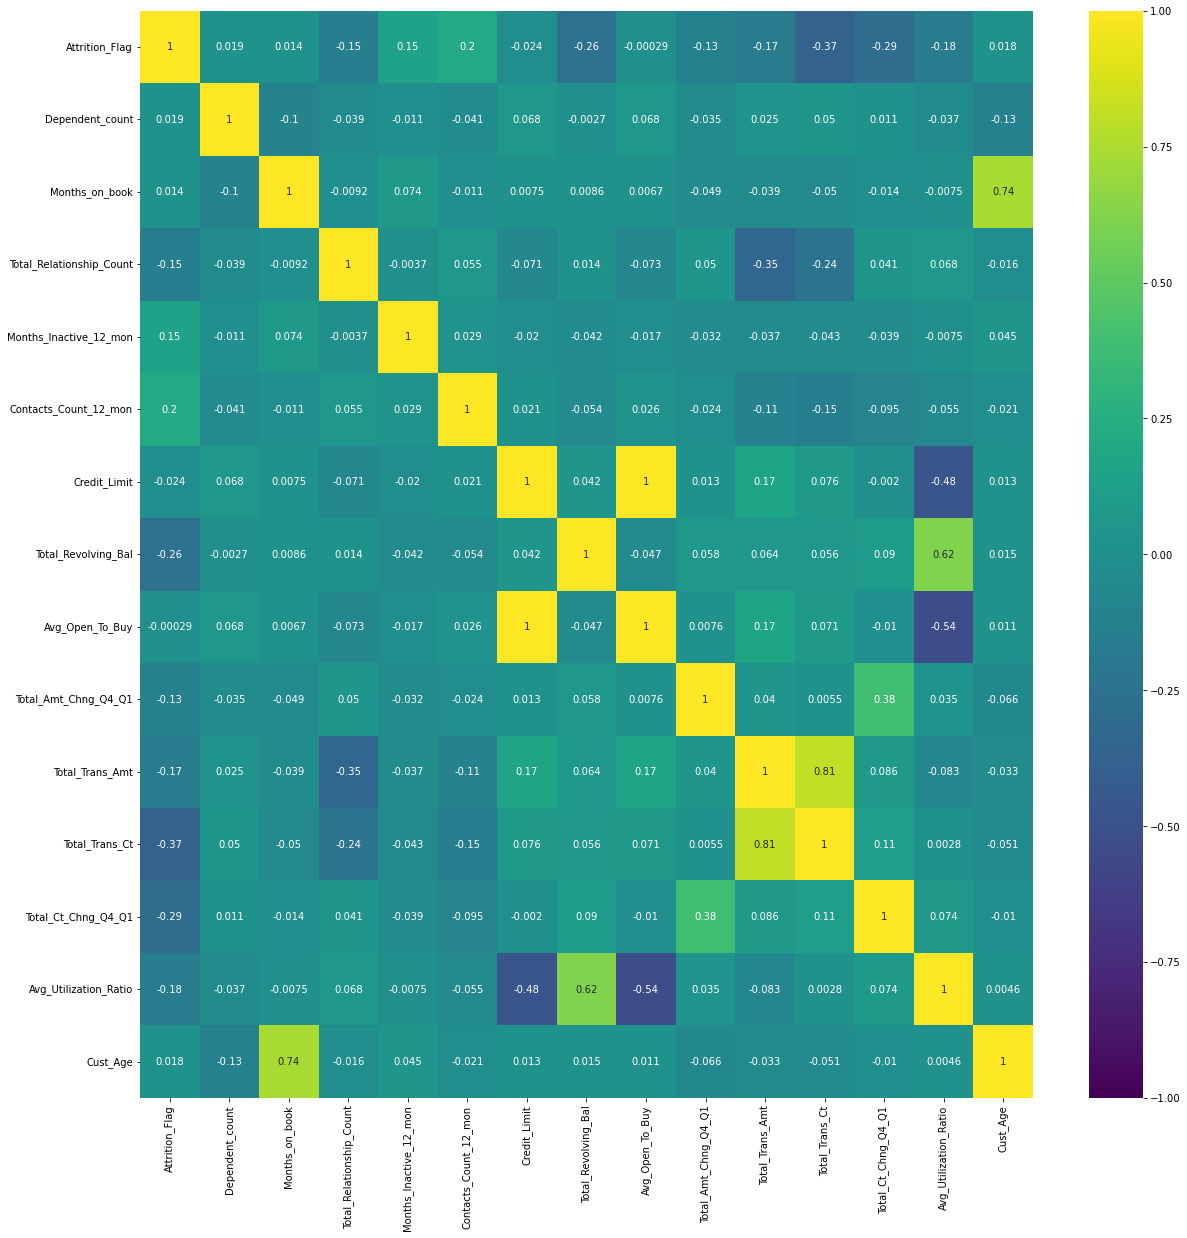

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='viridis', annot=True, vmin=-1, vmax=1)

In [63]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cust_Age'],
      dtype='object')

In [65]:
## dropping Customer_Age column as we coverted them into 6 bins in Cust_Age Column
df.drop(['Customer_Age'], axis=1, inplace=True)
df.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cust_Age'],
      dtype='object')

## Train-Test Data Split

In [70]:
from sklearn.model_selection import train_test_split


In [73]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df_attrition_flag, random_state=1, test_size=0.2)

In [74]:
x_train.shape

(8101, 32)

In [75]:
x_test.shape

(2026, 32)

In [76]:
y_train.shape

(8101, 1)

In [77]:
y_test.shape

(2026, 1)

## Model Building

### Decision Tree Classification

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

Accuracy of Decision Tree with default parameters: 0.9387956564659428

Classification Report of Decision Tree: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1695
           1       0.82      0.81      0.81       331

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix : 
 [[1635   60]
 [  64  267]]


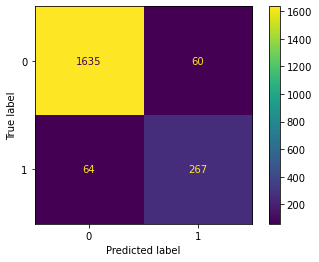

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Decision Tree with default parameters: {}\n'.format(accuracy))
print('Classification Report of Decision Tree: \n{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))
print(plot_confusion_matrix(dtree, x_test,y_test))

In [82]:
# hyper parameters tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names

In [85]:
param = {'criterion':['gini', 'entropy'], 'max_depth': [3,5,7,9,11,13], 'min_samples_split':range(2,12), 'min_samples_leaf': range(2,12)}

In [114]:
model_param = GridSearchCV(dtree,  param,cv=10, scoring='accuracy', verbose=1, n_jobs =1)
model_param.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': range(2, 12),
                         'min_samples_split': range(2, 12)},
             scoring='accuracy', verbose=1)

In [115]:
model_param.cv_results_

{'mean_fit_time': array([0.04577844, 0.03570428, 0.02992883, ..., 0.07898934, 0.07140822,
        0.07320416]),
 'std_fit_time': array([0.03624146, 0.01475987, 0.0051675 , ..., 0.0209728 , 0.00852069,
        0.00535638]),
 'mean_score_time': array([0.00482233, 0.00269012, 0.00268619, ..., 0.00280349, 0.00229521,
        0.00249345]),
 'std_score_time': array([0.0050408 , 0.00089677, 0.00045307, ..., 0.00096206, 0.00045689,
        0.00049833]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 3, ..., 13, 13, 13],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 2, ..., 11, 11, 11],
              mask=[False, False, False, ..., Fal

In [125]:
print(model_param.best_params_)
print(model_param.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 6}
0.94519188321079


In [122]:
## training the model with best_params from gridsearchcv
best_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf= 6, min_samples_split=6)
best_dtree = best_dtree.fit(x_train,y_train)
best_y_pred = best_dtree.predict(x_test)

Accuracy of Decision Tree with default parameters: 0.941263573543929

Classification Report of Decision Tree: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1695
           1       0.85      0.78      0.81       331

    accuracy                           0.94      2026
   macro avg       0.90      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Confusion Matrix : 
 [[1648   47]
 [  72  259]]


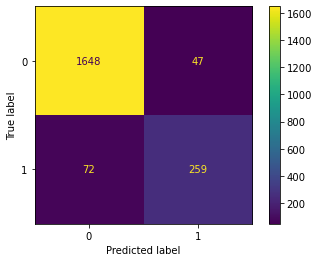

In [124]:
best_accuracy = accuracy_score(y_test, best_y_pred)
print('Accuracy of Decision Tree with default parameters: {}\n'.format(best_accuracy))
print('Classification Report of Decision Tree: \n{}'.format(classification_report(y_test, best_y_pred)))
print('Confusion Matrix : \n',confusion_matrix(y_test, best_y_pred))
print(plot_confusion_matrix(best_dtree, x_test,y_test))

## Handling Imbalanced Dataset using SMOTE Technique:

In [128]:
df.shape

(10127, 20)

In [129]:
df.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cust_Age
0,0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2
1,0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,2
2,0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3
3,0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,2
4,0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2


In [130]:
df.columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cust_Age'],
      dtype='object')

In [143]:
df.shape

(10127, 20)

In [135]:
## Encoding categorical features
cat_col = [col for col in df.columns if df[col].dtypes=='object']
cat_col

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [145]:
encode_df = pd.get_dummies(df, columns=['Gender', 'Education_Level','Marital_Status','Income_Category','Card_Category'], drop_first= True)
encode_df.shape

(10127, 33)

In [146]:
encode_df.head()

,Attrition_Flag,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,1,0,0,0,0,0,0
1,0,5,44,6,1,2,8256.0,864,7392.0,1.541,...,1,0,0,0,0,1,0,0,0,0
2,0,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,0,0,0,0
3,0,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,1,0,0,0,1,0,0,0,0
4,0,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,0,1,0,0,0,0,0,0


In [148]:
# Splitting Predictor and Target Variables
Y = encode_df[['Attrition_Flag']]
X = encode_df.iloc[:, 1:]
print(X.shape)
print(Y.shape)

(10127, 32)
(10127, 1)


In [153]:
# Scaling Predictor variables
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler()
scaled_df = scaled_df.fit_transform(X)
scaled_df

array([[ 0.50336813,  0.38462088,  0.76394261, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [ 2.04319867,  1.01071482,  1.40730617, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [ 0.50336813,  0.00896451,  0.12057905, ..., -0.10764411,
        -0.044484  , -0.24079371],
       ...,
       [-1.03646242,  0.00896451,  0.76394261, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [-0.26654715,  0.00896451,  0.12057905, ..., -0.10764411,
        -0.044484  , -0.24079371],
       [-0.26654715, -1.36844216,  1.40730617, ..., -0.10764411,
        -0.044484  ,  4.15293232]])

In [154]:
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)
scaled_df.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
1,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,...,1.252337,-0.282609,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
2,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,...,-0.798507,-0.282609,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794
3,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,...,-0.798507,3.538459,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794
4,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,...,-0.798507,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794


In [155]:
scaled_df.shape

(10127, 32)

In [156]:
Y.shape

(10127, 1)

In [165]:
# combining scaled_df and Y to form dataset which is scaled and encoded for sampling

my_df = pd.concat([scaled_df, Y], axis=1)
my_df.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,...,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794,0
1,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,...,-0.282609,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794,0
2,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,...,-0.282609,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794,0
3,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,...,3.538459,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,-0.107644,-0.044484,-0.240794,0
4,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,...,-0.282609,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,-0.107644,-0.044484,-0.240794,0


In [168]:
# finding observations of each class before sampling
attr_true = my_df[my_df['Attrition_Flag']==1]
attr_false = my_df[my_df['Attrition_Flag']==0]

In [169]:
print(attr_true.shape)
print(attr_false.shape)

(1627, 33)
(8500, 33)


In [180]:
# Clearly an imbalance dataset, hence applying SMOTE oversampling technique on it
# SMOTE forms synthetic instances of under class using interpolation technique
from imblearn.over_sampling import SMOTE
bal_df = SMOTE(random_state=1)
X_smp, Y_smp = bal_df.fit_resample(scaled_df, Y)


In [185]:
Y_smp.value_counts()

Attrition_Flag
0                 8500
1                 8500
dtype: int64

In [182]:
#train_test split
x_train, x_test, y_train, y_test = train_test_split(X_smp, Y_smp,random_state=1, test_size=0.2)

In [183]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(13600, 32)
(13600, 1)
(3400, 32)
(3400, 1)


## Model Building

In [210]:
### Decision_Tree Model

dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(x_train, y_train)
y_sm_pred=dt.predict(x_test)
y_sm_pred_prob = dt.predict_proba(x_test)

In [189]:
import sklearn
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get

In [202]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, auc, RocCurveDisplay

In [192]:
accuracy_score(y_test,y_sm_pred )

0.9447058823529412

In [194]:
precision_score(y_test, y_sm_pred)

0.9418202764976958

In [195]:
recall_score(y_test, y_sm_pred)

0.9494773519163763

In [196]:
confusion_matrix(y_test, y_sm_pred)

array([[1577,  101],
       [  87, 1635]], dtype=int64)

In [198]:
print(classification_report(y_test, y_sm_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1678
           1       0.94      0.95      0.95      1722

    accuracy                           0.94      3400
   macro avg       0.94      0.94      0.94      3400
weighted avg       0.94      0.94      0.94      3400



In [199]:
fpr, tpr, threshold = roc_curve(y_test, y_sm_pred)

In [205]:
auc= auc(fpr, tpr)

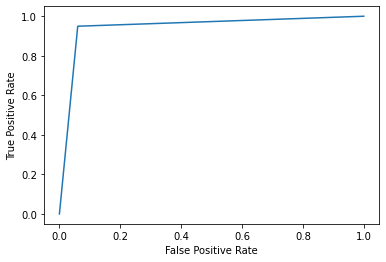

In [209]:
RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

In [226]:
y_sm_pred_prob[:, 1]

array([0., 1., 1., ..., 0., 1., 1.])

In [216]:
y_sm_pred

array([0, 1, 1, ..., 0, 1, 1])

In [227]:
fpr, tpr, threshold = roc_curve(y_test, y_sm_pred_prob[:,1])

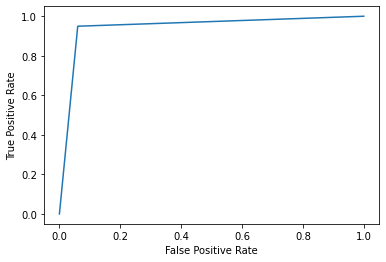

In [230]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [245]:
## Selecting best parameters using GridSearchCV
model_sm_param = GridSearchCV(dt,  param,cv=10, scoring='roc_auc', verbose=1, n_jobs =1)
model_sm_param.fit(x_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_samples_leaf': range(2, 12),
                         'min_samples_split': range(2, 12)},
             scoring='roc_auc', verbose=1)

## Boosting Algorithms:

In [237]:
#ref: https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/?ref=rp

### AdaBoosting (Adaptive Boosting)

In [239]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()